Quick notes:
- Use a GPU runtime: Runtime -> Change runtime type
- Keep reseting the session until you get a p100.
  - To check what GPU you got run `!nvidia-smi`
  - To reset runtime: `Runtime -> Factory reset runtime`


# Setup, run only once

In [0]:
!nvidia-smi

Tue Dec 24 13:35:26 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import os
!pip install -q torch torchvision feather-format kornia pyarrow Pillow wandb nbdev --upgrade
!pip install -q git+https://github.com/fastai/fastprogress@85d474778a90b8df4fe746882faeb3d00a9afcbc --upgrade
!pip install -q git+https://github.com/fastai/fastcore@463e76827090b4607ff8d95ca93cb98af31c2682 --upgrade
!pip install -q git+https://github.com/lgvaz/fastai2@snap1 --upgrade
os._exit(00)

     |████████████████████████████████| 122kB 9.5MB/s 
     |████████████████████████████████| 59.2MB 49kB/s 
     |████████████████████████████████| 2.1MB 59.6MB/s 
     |████████████████████████████████| 1.4MB 66.4MB/s 
     |████████████████████████████████| 40kB 7.7MB/s 
     |████████████████████████████████| 460kB 15.5MB/s 
     |████████████████████████████████| 92kB 14.0MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
     |████████████████████████████████| 256kB 58.3MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
     |████████████████████████████████| 71kB 11.7MB/s 
     |████████████████████████████████| 184kB 67.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [0]:
from fastai2.basics import *
from fastai2.vision.all import *
from fastai2.callback.all import *
from torchvision.utils import save_image

In [0]:
!wget https://raw.githubusercontent.com/pytorch/examples/master/fast_neural_style/neural_style/transformer_net.py -O transformer_net.py
from transformer_net import TransformerNet

--2019-12-24 13:39:01--  https://raw.githubusercontent.com/pytorch/examples/master/fast_neural_style/neural_style/transformer_net.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3782 (3.7K) [text/plain]
Saving to: ‘transformer_net.py’

transformer_net.py  100%[===================>]   3.69K  --.-KB/s    in 0s      

2019-12-24 13:39:01 (55.4 MB/s) - ‘transformer_net.py’ saved [3782/3782]



-----------------------------
For the next cell to run you need to upload a pretrained model that you can find on drive  
Currently the model in use is `'village.pth'`, change the name to match to model you uploaded.  

-----------------------------

In [0]:
m = TransformerNet()
m.load_state_dict(torch.load('mosaic.pth')['model'])
_ = m.cuda()

In [0]:
pipe = Pipeline([PILImage.create, Resize(2048), ToTensor(), IntToFloatTensor(), Normalize.from_stats(*imagenet_stats, cuda=False)])

# Stylize your image

---

Upload a image and run the next cell, make sure the file name matches the file name in the cell bellow.  
The stylized image will be saved as `output.png`

---

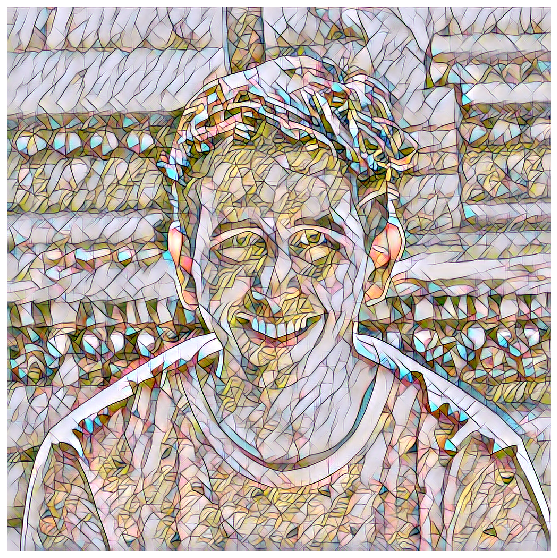

In [0]:
timg = pipe('profile.jpg').cuda()
pred = TensorImage(m(timg)).cpu()
save_image(pipe.decode(pred)[0], 'output.png')
show_images(pipe.decode(pred), figsize=(10,10))